### Part 2

In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
# from IPython.display import Image

#### 1

In [2]:
def boxfilter(n):
  #check whether n is odd, if not signal an assert error
  assert n % 2 != 0, "Dimension must be odd"

  # create a n by n filter with all entries equal to 1
  rows, cols = (n, n)
  arr_2d = [[1 for i in range(rows)] for j in range(cols)]

  # normalize values in the filter such that they sum up to 1
  arr_2d = arr_2d/np.sum(arr_2d)

  return arr_2d

The results of boxfilter(n) function for the cases n=3, n=4, and n=5:

In [3]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
boxfilter(4)

AssertionError: ignored

In [5]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

#### 2

In [6]:
def gauss1d(sigma):
  # calculate the dimension of the 1D Gaussian filter
  dim = math.ceil(6 * sigma)

  # if dim is not an odd integer, round it up to the next odd integer
  if (dim % 2 == 0):
    dim = dim + 1
  
  # initialize the 1D filter as a zero-centered arr
  center = math.floor(dim/2)
  arr = [i - center for i in range(dim)]

  # apply the density funtion to the arr
  arr = np.exp(-1 * np.power(arr, 2) / (2 * np.power(sigma, 2)))

  # normalize arr
  arr = arr/np.sum(arr)
  
  return arr


The filter values produced for sigma values of 0.3, 0.5, 1, and 2:

In [7]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [8]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [9]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [10]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

#### 3

In [11]:
def gauss2d(sigma):
  # generate a 1D Gaussian filter
  arr_1d = gauss1d(sigma)

  # generate a 2D Gaussian filter by convolution of arr_1d with its transpose.
  arr_2d = signal.convolve2d(arr_1d[np.newaxis], arr_1d[np.newaxis].T)
  
  return arr_2d

The 2D Gaussian filter for sigma values of 0.5 and 1:

In [12]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [13]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

#### 4 (a)

In [14]:
def convolve2d_manual(array, filter):

  # make a 2D array with zero paddings around original array
  pad_width = math.floor(len(filter)/2)
  pad_arr = np.pad(array, pad_width= pad_width)

  # get the dimension of the original image array
  arr_rows = len(array)
  arr_cols = len(array[0])

  # get the dimension of the filter
  f_rows = len(filter)
  f_cols = len(filter[0])

  # initialize the output image array 
  output_image = np.zeros_like(array)

  # loop over the image array
  for x in range(arr_rows):
    for y in range(arr_cols):
      # applying the convolution formula
      output_image[x,y] = (pad_arr[x:x+f_rows, y:y+f_cols] * filter[::-1,::-1]).sum()
  return output_image

#### 4 (b)

In [15]:
def gaussconvolve2d_manual(array,sigma):
  # generate a filter with gauss2d function
  gauss_2d = gauss2d(sigma)

  # return the output image array after convolution
  return convolve2d_manual(array, gauss_2d)


#### 4(c)

In [16]:
# Load the dog image
dog_image = Image.open('dog.jpg')

# convert it to greyscale
dog_grey = dog_image.convert('L')

# convert the image to a numpy array 
dog_grey_arr = np.asarray(dog_grey)

# call gaussconvolve2d_manual with sigma = 3
filtered_dog = gaussconvolve2d_manual(dog_grey_arr, 3)

# convert the array back to a unit8 array so we can write to a file
dog_array = filtered_dog.astype('uint8')

# convert the numpy array back to a PIL image
filtered_dog_img = Image.fromarray(dog_array)

#### 4(d)

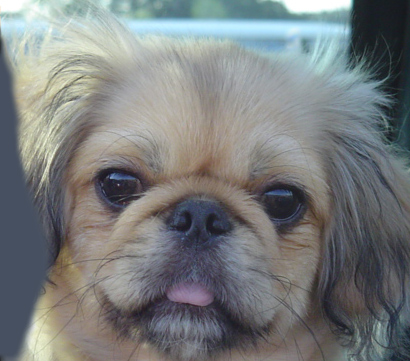

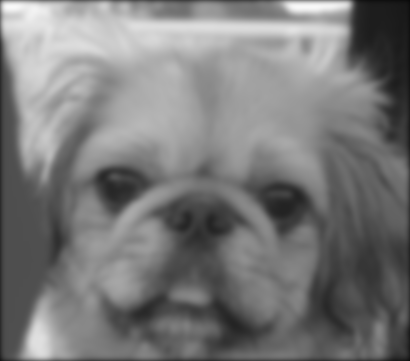

In [17]:
# display original image
display(dog_image)

# display filtered image
display(filtered_dog_img)

#### 5(a)

In [18]:
def gaussconvolve2d_scipy(array,sigma):
  # generate a filter with gauss2d funtion
  gauss_2d = gauss2d(sigma)
  # apply gauss_2d to the array with signal.convolve2d funtion
  return signal.convolve2d(array,gauss_2d,'same')

Scipy have separate functions signal.convolve2d() and signal.correlate2d() since signal.convolve2d() convolves the input array and filter, while signal.correlate2d() cross correlates the input array and filter. When the filter is symmetric, these two functions will produce same results. Otherwise, the results will be different since convolution rotates the filter by 180 degree.

#### 5(b)

In [19]:
# call gaussconvolve2d_scipy with sigma = 3
scipy_dog = gaussconvolve2d_scipy(dog_grey_arr, 3)

# convert the array back to a unit8 array so we can write to a file
scipy_dog_array = scipy_dog.astype('uint8')

# convert the numpy array back to a PIL image
scipy_dog_img = Image.fromarray(scipy_dog_array)

#### 5(c)

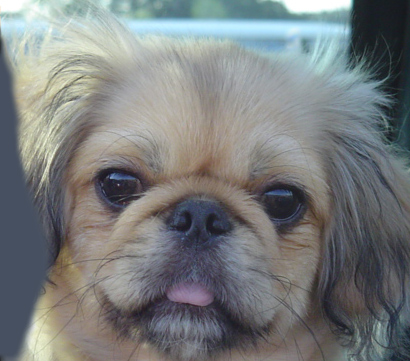

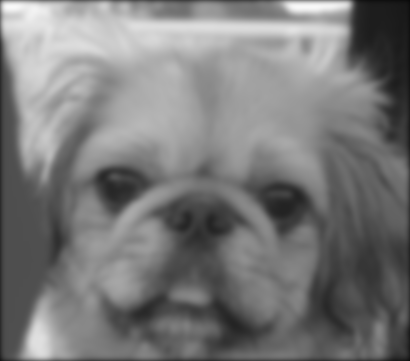

In [20]:
# display original image
display(dog_image)

# display filtered image
display(scipy_dog_img)

#### 6

In [21]:
import time
t1 = time.time() # start timestamp
gaussconvolve2d_manual(dog_grey_arr, 10) # operation to time
duration1 = time.time() - t1 # duration in seconds
print("Time to convolve using gaussconvolve2d_manual(): ",duration1, "seconds.")

Time to convolve using gaussconvolve2d_manual():  1.86356782913208 seconds.


In [22]:
t2 = time.time() # start timestamp
gaussconvolve2d_scipy(dog_grey_arr, 10) # operation to time
duration2 = time.time() - t2 # duration in seconds
print("Time to convolve using gaussconvolve2d_scipy(): ",duration2, "seconds.")

Time to convolve using gaussconvolve2d_scipy():  1.510056495666504 seconds.


When sigma = 10, gaussconvolve2d_scipy() is faster the manual one. The manual one uses brute force on the $n \times n$ image and $m \times m$ filter, thus having time complexity = $O(m^2n^2)$. When the size of the image is large and sigma is large, the manual one will be slow.

#### 7

By taking advantage of separability, this could be implemented more efficiently. According to the lecture notes, the 2D Gaussian can be expressed as a product of two function, one function of $x$ and another function of $y$. Then we will get two identical 1D Gaussians. Now, at each pixel $(X,Y)$, there are $2m$ multiplications and there are $n \times n$ pixels in total. Hence, the overall time complexity would be $O(2m\times n^2)$, which is faster than the previous one with time complexity = $O(m^2n^2)$.

### Part 3

#### 1

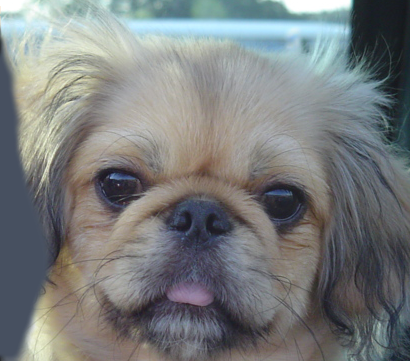

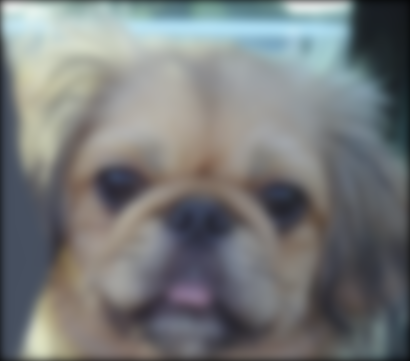

In [23]:
from google.colab.patches import cv2_imshow
# Load the dog image as im1
im1 = cv2.imread('0b_dog.bmp')

# seperate RGB channel
im1_r, im1_g, im1_b = cv2.split(im1)

# blur each color channel
b_im1_r = gaussconvolve2d_scipy(im1_r, 5)
b_im1_g = gaussconvolve2d_scipy(im1_g, 5)
b_im1_b = gaussconvolve2d_scipy(im1_b, 5)

# compose the channels back to the color image
combine1 = cv2.merge([b_im1_r, b_im1_g, b_im1_b])

# display original image
cv2_imshow(im1)
# display filtered image
cv2_imshow(combine1)

#### 2

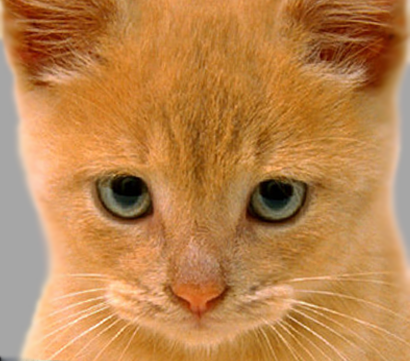

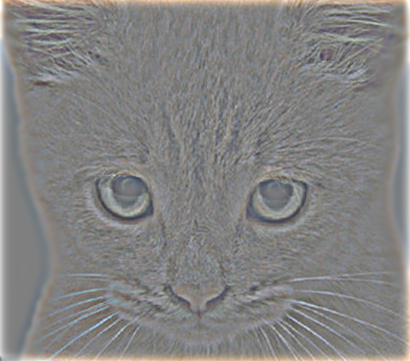

In [24]:
# Load the dog image as im1
im2 = cv2.imread('0a_cat.bmp')

# seperate RGB channel
im2_r, im2_g, im2_b = cv2.split(im2)

# High frequency filtered each color channel
h_im2_r = im2_r - gaussconvolve2d_scipy(im2_r, 5)
h_im2_g = im2_g - gaussconvolve2d_scipy(im2_g, 5)
h_im2_b = im2_b - gaussconvolve2d_scipy(im2_b, 5)

# compose the channels back to the color image
combine2 = cv2.merge([h_im2_r, h_im2_g, h_im2_b])

# visualize by adding 128
combine2 = combine2 + 128

# display original image
cv2_imshow(im2)
# display filtered image
cv2_imshow(combine2)

#### 3

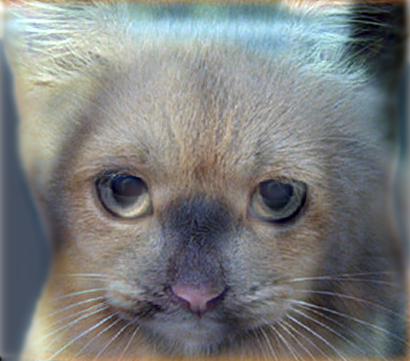

In [25]:
# add the low and high frquency images (per channel)
mix_img = cv2.merge([b_im1_r + h_im2_r,b_im1_g + h_im2_g, b_im1_b + h_im2_b])

# display the mixed image
cv2_imshow(mix_img)

In [26]:
def mix_image(image1, image2, sigma):
  
  # Load image1 as im1
  im1 = cv2.imread(image1)

  # Load image1 as im1
  im2 = cv2.imread(image2)

  # seperate RGB channel of im1
  im1_r, im1_g, im1_b = cv2.split(im1)

  # seperate RGB channel of im2
  im2_r, im2_g, im2_b = cv2.split(im2)

  # Low frequency filtered each color channel of im1
  l_im1_r = gaussconvolve2d_scipy(im1_r, sigma)
  l_im1_g = gaussconvolve2d_scipy(im1_g, sigma)
  l_im1_b = gaussconvolve2d_scipy(im1_b, sigma)

  # High frequency filtered each color channel of im2
  h_im2_r = im2_r - gaussconvolve2d_scipy(im2_r, sigma)
  h_im2_g = im2_g - gaussconvolve2d_scipy(im2_g, sigma)
  h_im2_b = im2_b - gaussconvolve2d_scipy(im2_b, sigma)

  # compose the channels of high frequency filtered back to the color image
  h_im2 = cv2.merge([h_im2_r, h_im2_g, h_im2_b])

  # visualize h_im2 by adding 128
  h_im2 = h_im2 + 128

  # compose the channels of low frequency filtered back to the color image
  l_im1 = cv2.merge([l_im1_r, l_im1_g, l_im1_b])

  # add the low and high frquency images (per channel)
  mix_img = cv2.merge([l_im1_r + h_im2_r,l_im1_g + h_im2_g, l_im1_b + h_im2_b])
  
  # display low frequency filtered image1
  cv2_imshow(l_im1)

  # display low frequency filtered image2
  cv2_imshow(h_im2)

  # display the mixed image
  cv2_imshow(mix_img)

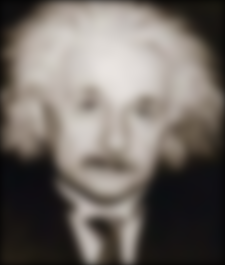

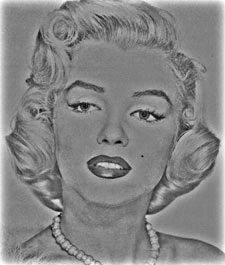

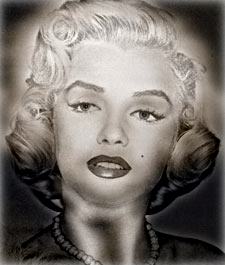

In [27]:
# Experiment 1.1
# Use the Einstein image as image1
# Use the Marilyn image as image2
# sigma = 5
mix_image('2a_einstein.bmp', '2b_marilyn.bmp', 5)

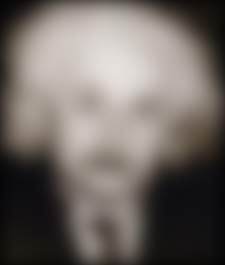

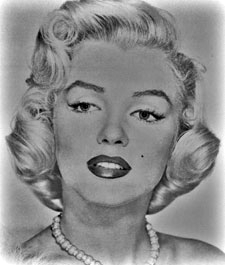

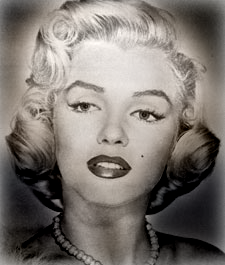

In [28]:
# Experiment 1.2
# Use the Einstein image as image1
# Use the Marilyn image as image2
# sigma = 10
mix_image('2a_einstein.bmp', '2b_marilyn.bmp', 10)

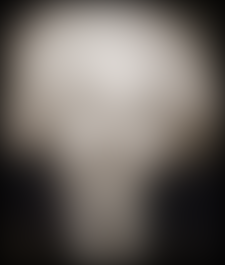

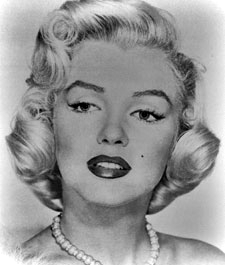

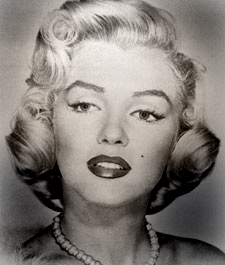

In [29]:
# Experiment 1.3
# Use the Einstein image as image1
# Use the Marilyn image as image2
# sigma = 20
mix_image('2a_einstein.bmp', '2b_marilyn.bmp', 20)

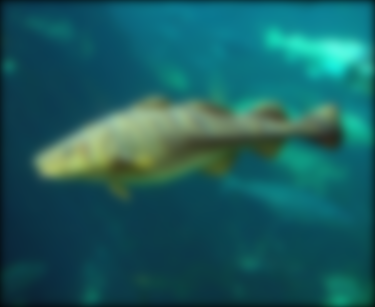

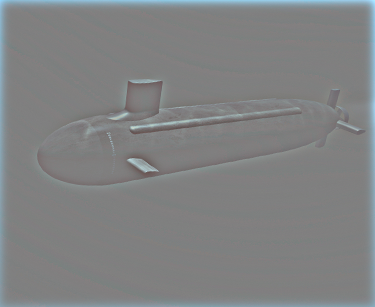

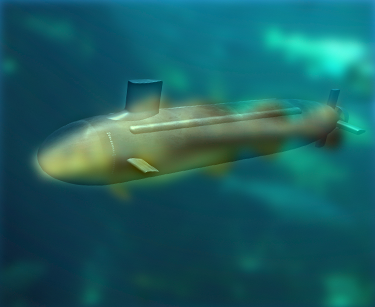

In [30]:
# Experiment 2.1
# Use the Fish image as image1
# Use the Submarine image as image2
# sigma = 5
mix_image('3a_fish.bmp', '3b_submarine.bmp', 5)

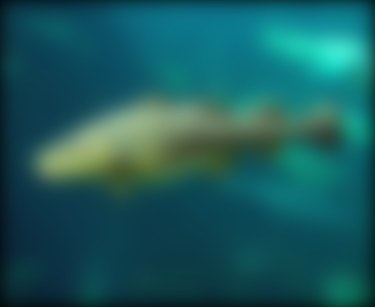

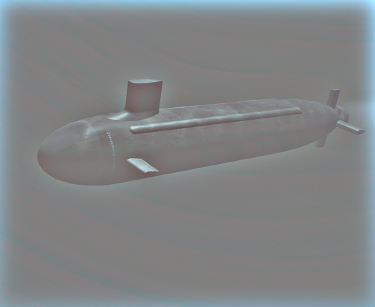

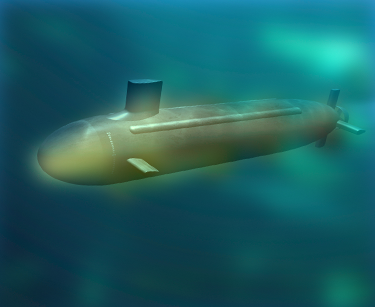

In [31]:
# Experiment 2.2
# Use the Fish image as image1
# Use the Submarine image as image2
# sigma = 10
mix_image('3a_fish.bmp', '3b_submarine.bmp', 10)

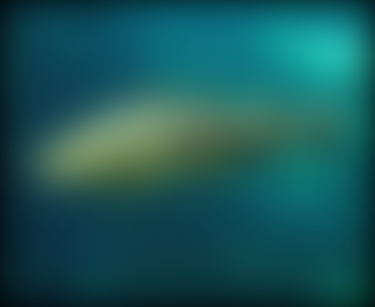

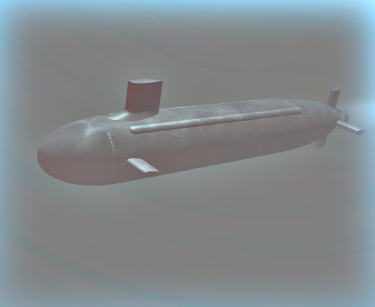

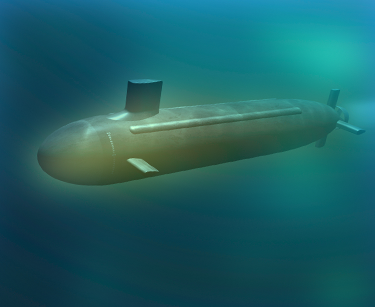

In [32]:
# Experiment 2.3
# Use the Fish image as image1
# Use the Submarine image as image2
# sigma = 20
mix_image('3a_fish.bmp', '3b_submarine.bmp', 20)

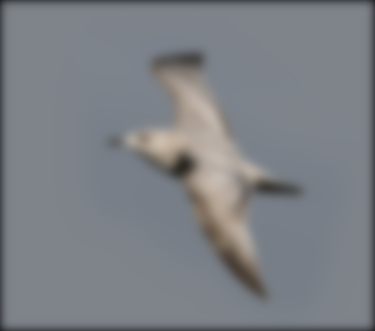

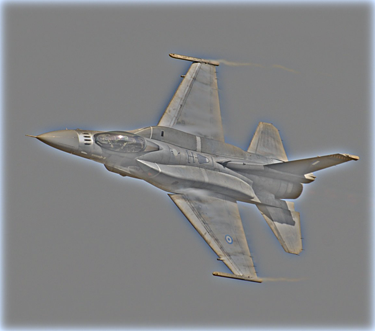

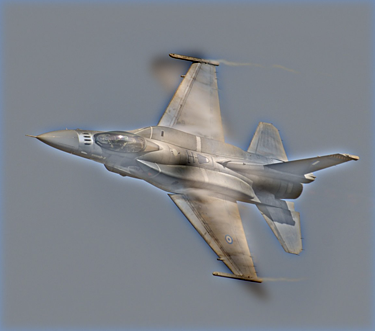

In [33]:
# Experiment 3.1
# Use the Bird image as image1
# Use the Plane image as image2
# sigma = 5
mix_image('4a_bird.bmp', '4b_plane.bmp', 5)

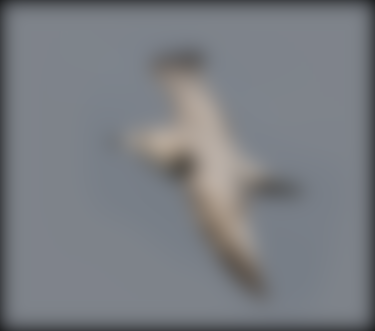

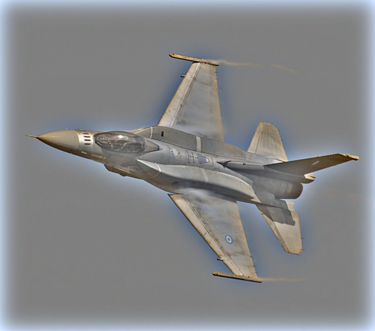

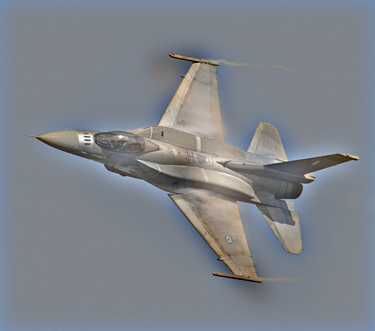

In [34]:
# Experiment 3.2
# Use the Bird image as image1
# Use the Plane image as image2
# sigma = 10
mix_image('4a_bird.bmp', '4b_plane.bmp', 10)

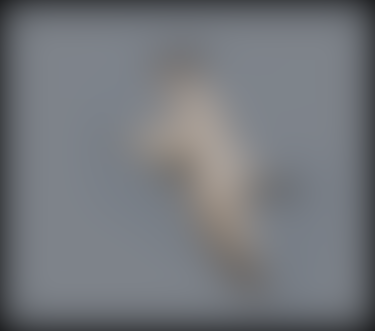

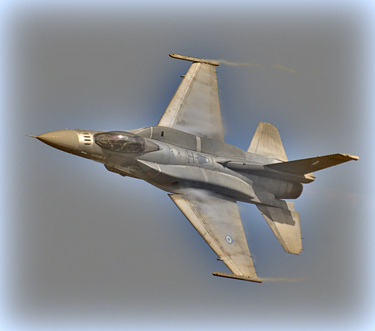

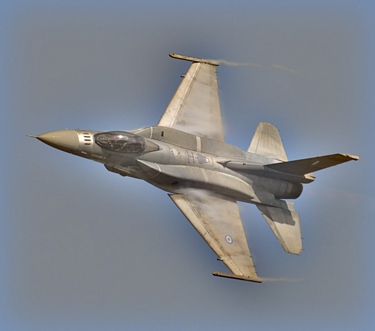

In [35]:
# Experiment 3.3
# Use the Bird image as image1
# Use the Plane image as image2
# sigma = 20
mix_image('4a_bird.bmp', '4b_plane.bmp', 20)

### Part 4

#### 1

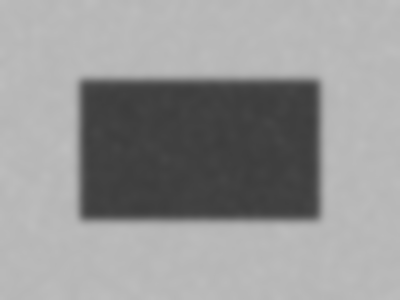

In [36]:
# Load box_gauss image
box_g = cv2.imread('box_gauss.png')

# Set Gaussian filter sigma
sigma = 4

# Apply Gaussian blur to the box_gauss image
GaussianBlur_box_g = cv2.GaussianBlur(box_g, (0,0), sigma)

# Display the denoised image
cv2_imshow(GaussianBlur_box_g)


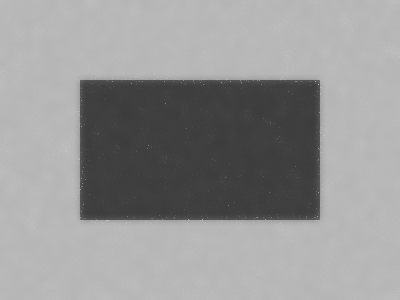

In [37]:
# Apply bilateral filter to the box_gauss image
BilateralFilter_box_g = cv2.bilateralFilter(box_g,15,220,220)

# Display the denoised image
cv2_imshow(BilateralFilter_box_g)

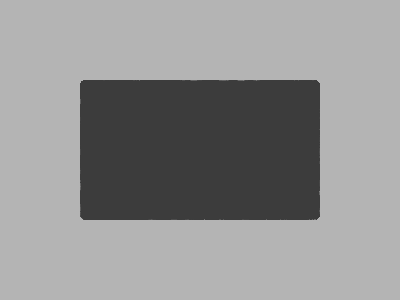

In [38]:
# Apply median blur to the box_gauss image
MedianBlur_box_g = cv2.medianBlur(box_g,7)

# Display the denoised image
cv2_imshow(MedianBlur_box_g)


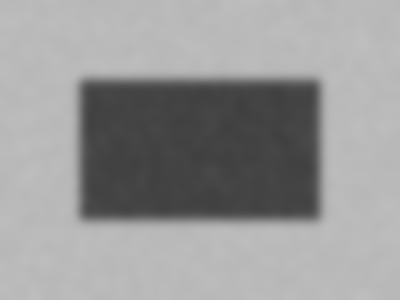

In [39]:
# Load box_speckle image
box_s = cv2.imread('box_speckle.png')

# Set Gaussian filter sigma
sigma = 5

# Apply Gaussian blur to the box_speckle image
GaussianBlur_box_s = cv2.GaussianBlur(box_s, (0,0), sigma)

# Display the denoised image
cv2_imshow(GaussianBlur_box_s)


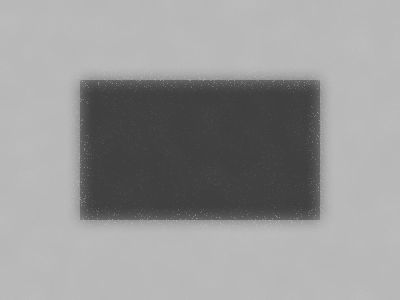

In [40]:
# Apply bilateral filter to the box_speckle image
BilateralFilter_box_s = cv2.bilateralFilter(src=box_s, d=0, sigmaColor=300, sigmaSpace=10)

# Display the denoised image
cv2_imshow(BilateralFilter_box_s)


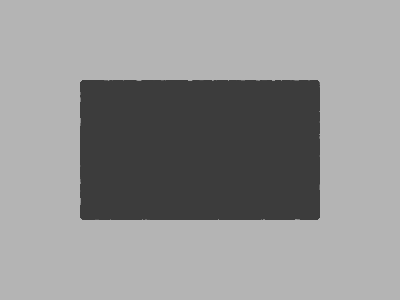

In [41]:
# Apply median blur to the box_gauss image
MedianBlur_box_s = cv2.medianBlur(box_s,5)

# Display the denoised image
cv2_imshow(MedianBlur_box_s)

#### 2

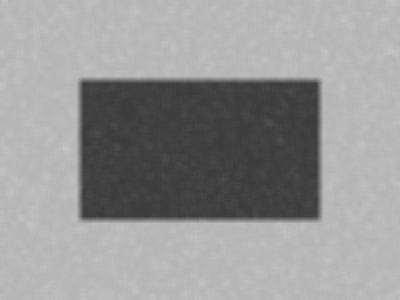

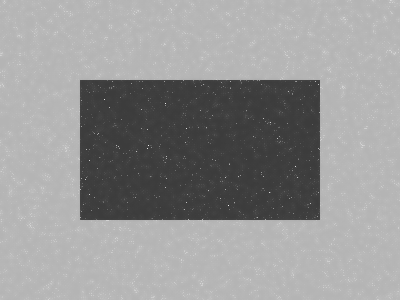

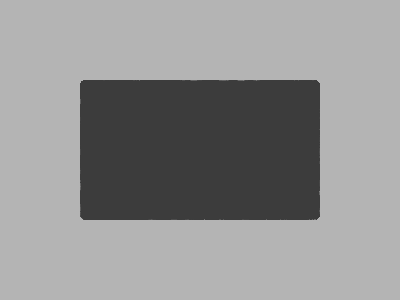

In [42]:
# Apply Gaussian blur to the box_gauss image
GaussianBlur_box_g = cv2.GaussianBlur(box_g, ksize=(7, 7), sigmaX=50)

# Apply bilateral filter to the box_gauss image
BilateralFilter_box_g = cv2.bilateralFilter(box_g, 7, sigmaColor=150, sigmaSpace=150)

# Apply median blur to the box_gauss image
MedianBlur_box_g = cv2.medianBlur(box_g,7)

# Display the denoised images
cv2_imshow(GaussianBlur_box_g)
cv2_imshow(BilateralFilter_box_g)
cv2_imshow(MedianBlur_box_g)

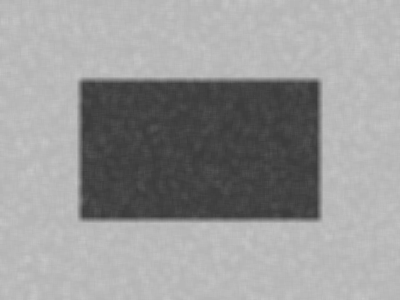

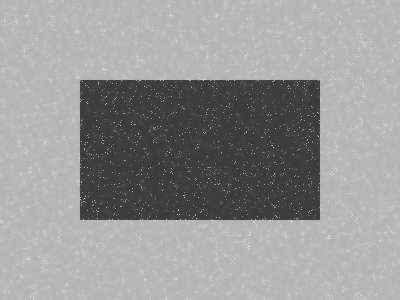

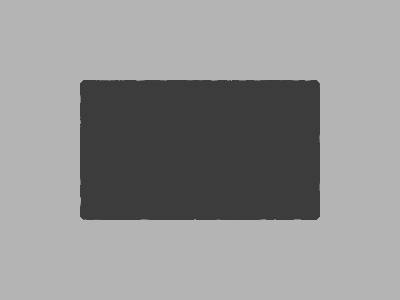

In [43]:
# Apply Gaussian blur to the box_speckle image
GaussianBlur_box_s = cv2.GaussianBlur(box_s, ksize=(7, 7), sigmaX=50)

# Apply bilateral filter to the box_speckle image
BilateralFilter_box_s = cv2.bilateralFilter(box_s, 7, sigmaColor=150, sigmaSpace=150)

# Apply median blur to the box_speckle image
MedianBlur_box_s = cv2.medianBlur(box_s,7)

# Display the denoised images
cv2_imshow(GaussianBlur_box_s)
cv2_imshow(BilateralFilter_box_s)
cv2_imshow(MedianBlur_box_s)

1) Gaussian filter
- Pros: a) It can take advantage of separability, and thus have a time complexity of $O(2m \times n^2)$. b) It can remove the noise.

- Cons: a) Losing fine image details and constrast.

2) Bilateral filter
- Pros: Preserving edge sharpness and details.

- Cons: a) It does not perform denoise very well. b) Being computationally more expensive than Gaussian filter due to taking both the range distance from the center pixel and the similarity in brightness value compared to the center into account.

3) Median filter
- Pros: a) Preserving edges. b) Being robust to outliers because of using the median value of the pixels in a neighborhood around the pixel.

- Cons: a) Blur fine details. b) Being computationally more expensive than Gaussian filter.

In [ ]:
# export a PDF from the Jupyter Notebook in CoLab
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from google.colab import drive 
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-ut

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Assignment1.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "Assignment1.ipynb"